# Structured Coalescent

# 0) Import

In [1]:
from Structured_Coalescent_Otto import *

___

# 1) Stationary distribution

Make the stationary distribution, according to

$$\pi P=P $$

where $P$ is the transition matrix of the unequal recombination process

In [2]:
E = 20
Stat_distr = make_stat_distr(E)

100%|██████████| 70/70 [00:08<00:00,  8.49it/s]


Plot

<IPython.core.display.Javascript object>


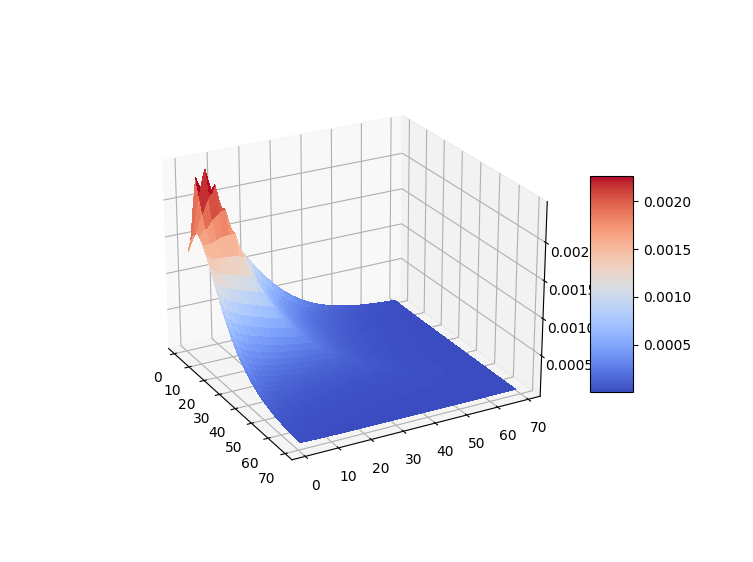

<ipython-input-3-2ab1a1c01373>:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [3]:
%matplotlib notebook

n_max = n_max_UE(E)
fig = plt.figure()
ax = fig.gca(projection='3d')
X = range(1,n_max)
Y = range(1,n_max)
X, Y = np.meshgrid(X, Y)

Z = Stat_distr[coef(X,Y,n_max)]



surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# 2) Mixing Time

The distance function $d$ is defined via the total variation $\| \cdot \|_{TV}$, i.e.

$$ d(t) = \max\limits_x \|P^t_x - \pi \|_{TV} $$

The mixing time $t_{mix}$ is defined as the time, at which $d(t)$ is less than $\frac{1}{4}$, i.e.

$$ t_{mix} = \min \{t: d(t) < \frac{1}{4} \} $$

In [4]:
E_vec = [5,10,15]

t_mix = [Mixing_time(E) for E in E_vec]

Calculating P^12 for E=15


Regression function: t_mix(E) = [0.7] E + 2.666666666666665


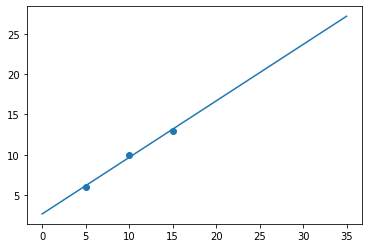

In [5]:
%matplotlib inline
plt.scatter(E_vec,t_mix)

regression_model = LinearRegression().fit(np.array(E_vec).reshape((-1, 1)), np.array(t_mix))

x = np.linspace(0,35,100).reshape((-1,1))
y = regression_model.predict(x)

plt.plot(x,y)

print(f'Regression function: t_mix(E) = {regression_model.coef_} E + {regression_model.intercept_}')

# 3) Verfication

### 3.1) Symmetric Island

![title](SymIsland.png)

In [6]:
states = states_Sym()
P = make_P_Sym()
pop_distr = pop_distr_Sym()

In [7]:
m = 0.001
N = 1000

M = m*P
pop_size = np.array(N*pop_distr)
coalescence = 1/pop_size

smin = 1e-8
smax = 1e-6
srange = np.arange(smin,smax,(smax-smin)/10)
srange = np.append(srange,np.arange(smax,1e-2,(1e-2-smax)/20))

In [8]:
MSPRIME_data = make_ctime_msprime(states,0.5*M,0.5*pop_size,iterations=500,rep=np.inf,save_as_file=False)
LINEQ_data = make_ctime_lineq(0.5*M,coalescence,srange)

30/30
Generate Coefficient matrix A:


100%|██████████| 5/5 [00:00<00:00, 5620.88it/s]

Solve Ax=b


Plot

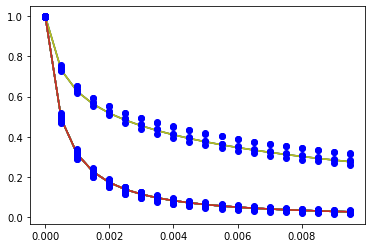

In [9]:
for i in range(1,len(states)**2):
    plt.plot(LINEQ_data[:,0],LINEQ_data[:,i])

for i in range(1,len(MSPRIME_data)):
    plt.plot(srange,emp_laplace(srange,MSPRIME_data[i][1]),'bo')

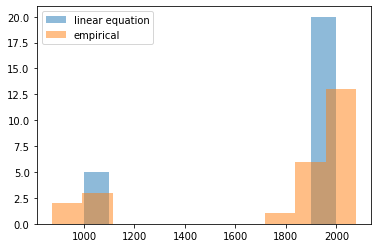

In [10]:
plt.hist(np.array(E_Var_lineq(LINEQ_data))[:,1],label='linear equation',alpha=0.5)
plt.hist(np.array(E_Var_msprime(MSPRIME_data))[:,1],label='empirical',alpha=0.5)
plt.legend()

### 3.2) Continental Island

![title](Continental_Island.png)

In [11]:
states = states_Cont()
P = make_P_Cont(states)
pop_distr = pop_distr_Cont()

In [12]:
m = 0.001
N = 1000

M = m*P
pop_size = np.array(N*pop_distr)
coalescence = 1/pop_size

smin = 1e-8
smax = 1e-6
srange = np.arange(smin,smax,(smax-smin)/10)
srange = np.append(srange,np.arange(smax,1e-2,(1e-2-smax)/20))

In [13]:
MSPRIME_data = make_ctime_msprime(states,0.5*M,0.5*pop_size,iterations=500,rep=np.inf,save_as_file=False)
LINEQ_data = make_ctime_lineq(0.5*M,coalescence,srange)

30/30
Generate Coefficient matrix A:


100%|██████████| 25/25 [00:00<00:00, 501.07it/s]


Solve Ax=b


Plot

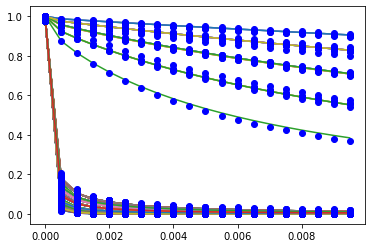

In [14]:
for i in range(1,len(states)**2):
    plt.plot(LINEQ_data[:,0],LINEQ_data[:,i])

for i in range(1,len(MSPRIME_data)):
    plt.plot(srange,emp_laplace(srange,MSPRIME_data[i][1]),'bo')

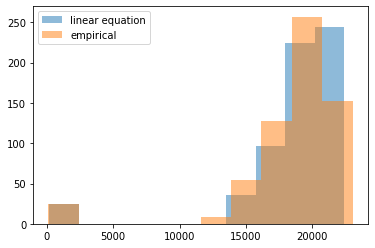

In [15]:
plt.hist(np.array(E_Var_lineq(LINEQ_data))[:,1],label='linear equation',alpha=0.5)
plt.hist(np.array(E_Var_msprime(MSPRIME_data))[:,1],label='empirical',alpha=0.5)
plt.legend()

# 4) Unequal Recombination

![title](Unequal_Recombination.png)

In [16]:
E = 5
m = 0.01
N = 1000
n_max = n_max_UE(E)

states = states_UE(E)
pop_distr = pop_distr_UE(E,states)
P = make_P_UE(E)

grid = np.arange(1,n_max,(n_max-1)/5).astype(int)
sample_state = []
for i in range(len(grid)):
    for j in range(len(grid)):
        sample_state += [states.index(str(grid[i])+'|'+str(grid[j]))]

M = m*P
pop_size = N*np.array(pop_distr)

100%|██████████| 21/21 [00:00<00:00, 101.44it/s]


In [17]:
MSPRIME_data = make_ctime_msprime(states,0.5*M,0.5*pop_size,iterations=100,rep=np.inf,sample_state=sample_state,save_as_file=False)

CTime_msprime.csv


100%|██████████| 25/25 [02:31<00:00,  6.07s/it]


Plot

(array([ 17.,   2.,   3.,   3.,   0.,  18., 155., 275., 136.,  16.]),
 array([9.00000000e-06, 1.97330599e+00, 3.94660298e+00, 5.91989997e+00,
        7.89319696e+00, 9.86649395e+00, 1.18397909e+01, 1.38130879e+01,
        1.57863849e+01, 1.77596819e+01, 1.97329789e+01]),
 <BarContainer object of 10 artists>)

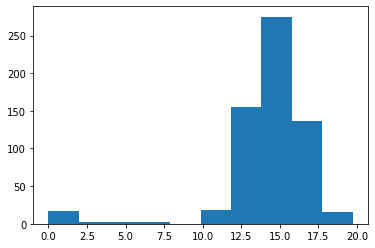

In [18]:
plt.hist(np.array(E_Var_msprime(MSPRIME_data))[:,1]/N)

# 5) Site frequency spectrum

![title](SFS_schema.png)

In [19]:
E = 3
m = 0.01
N = 80000
theta = 5
n_max = n_max_UE(E)

states = states_UE(E)
pop_distr = pop_distr_UE(E,states)
P = make_P_UE(E)

M = (0.5*m)/N*P
pop_size = N*np.array(pop_distr)

100%|██████████| 14/14 [00:00<00:00, 228.71it/s]


In [20]:
n = len(states)
alpha=np.zeros(n)
scenario = 1

if (scenario == 1):
    alpha[states.index('1|3')] += 5
    alpha[states.index('2|2')] += 5
    alpha[states.index('3|1')] += 5
if (scenario == 2):
    alpha[states.index('1|1')] += 1
    alpha[states.index('1|2')] += 1
    alpha[states.index('2|1')] += 1
    alpha[states.index('1|3')] += 1
    alpha[states.index('2|2')] += 1
    alpha[states.index('3|1')] += 1
    alpha[states.index('1|4')] += 1
    alpha[states.index('2|3')] += 1
    alpha[states.index('3|2')] += 1
    alpha[states.index('4|1')] += 1
    alpha[states.index('1|5')] += 1
    alpha[states.index('2|4')] += 1
    alpha[states.index('3|3')] += 1
    alpha[states.index('4|2')] += 1
    alpha[states.index('5|1')] += 1

In [21]:
pop_configs = []
for k in range(n):
    pop_configs.append(msprime.PopulationConfiguration(initial_size=pop_size[k],sample_size=int(alpha[k])))

In [22]:
SFS = make_SFS(N,M,m,alpha,pop_configs,theta=theta,iterations=100,save_as_file=False)

100%|██████████| 100/100 [00:09<00:00, 10.23it/s]


Plot

Text(0.5, 1.0, "['theta,rN', array([5.  , 0.01])]")

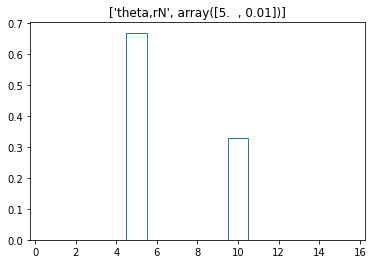

In [23]:
plt.stairs(SFS[1][3:],SFS[0][2:]+0.5)
plt.title(["theta,rN"]+[SFS[1][0:2]])